In [75]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [76]:
#Peak Amplitude/times of Damped(Ad, td) and Undamped(Au, td)
Au =np.array( [45.9435,45.8231,45.3093,45.4103,45.2899,44.9802,44.8598,44.705,44.4126,44.3976,44.3438,43.9654,43.8256,43.744,43.6214])
Au = Au-40  #capstone was not zeroed, data needs to be shifted
tu= np.array([0.74,1.7,2.7,3.69,4.64,5.63,6.64,7.61,8.57,9.58,10.54,11.53,12.5,13.5,14.48])
Ad=np.array([3.5621,2.7692,2.2532,2.2549,1.9453,1.67,1.4292,1.2744,1.0836,1.0164,0.8944,0.8272,0.7584,0.7068,0.6708])
td=np.array([0.39,1.36,2.36,3.37,4.36,5.33,6.33,7.34,8.28,9.32,10.29,11.28,12.25,13.27,14.21])

In [213]:
#Error for log(Amp) of damped and undamped data
eAu = np.divide(0.1, Au)
eAd =np.divide(0.1, Ad)


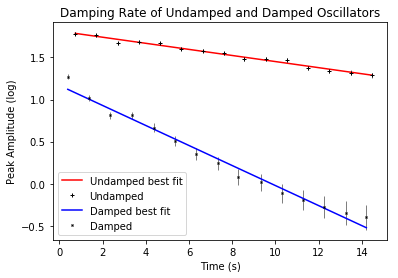

In [155]:
#Plotting Figure 3, Linearized fit
fig, ax = plt.subplots(nrows = 1, ncols = 1)

#linearized fit for Au and Ad
pAu, covAu= np.polyfit(tu, np.log(Au), 1, full=False, cov=True)
pAd, covAd = np.polyfit(td, np.log(Ad), 1, full=False, cov=True)

#Plotting undamped log data, best fit undamped, and error bars
ax.plot(tu, pAu[0]*tu+pAu[1], 'r-', label='Undamped best fit')
ax.plot(tu, np.log(Au), 'k+', label='Undamped', markersize=4)
ax.errorbar(tu, np.log(Au), yerr=eAu, ecolor='k', fmt='none', elinewidth=0.5)

#Plotting damped log data, best fit damped, and error bars
ax.plot(td, pAd[0]*td+pAd[1], 'b-',label='Damped best fit')
ax.plot(td, np.log(Ad), 'kx', label='Damped', markersize=2)
ax.errorbar(td, np.log(Ad), yerr=eAd, ecolor='k', fmt='none', elinewidth=0.5)

ax.set_title("Damping Rate of Undamped and Damped Oscillators")
ax.legend()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Peak Amplitude (log)")
plt.show()

**Figure 3** The logarithm of the peak Amplitude of Damped and Undamped Oscillators vs time.<br> The damping ratio of the Undamped oscillator is 0.0361 ± 0.001.<br> The damping ratio of the Damped oscillator is 0.119 ± 0.005.     

In [214]:
chiU = sum(np.power(np.divide((np.log(Au)-(pAu[0]*tu+pAu[1])), eAu), 2))
chiD = sum(np.power(np.divide((np.log(Ad)-(pAd[0]*td+pAd[1])), eAd), 2))
print (chiU)
print (chiD)

12.991787032
36.1892121457


In [234]:
print ("undamped slope and intercept:")
print (pAu)
print ("Uncertainty in undamped slope and intercept:")
print (np.power(np.diagonal(covAu), 1/2))
print ("damped slope and intercept:")
print (pAd)
print ("Uncertainty in damped slope and intercept:")
print (np.power(np.diagonal(covAd), 1/2))

undamped slope and intercept:
[-0.03614875  1.81241084]
Uncertainty in undamped slope and intercept:
[ 0.0013713   0.01193893]
damped slope and intercept:
[-0.1189113   1.16759537]
Uncertainty in damped slope and intercept:
[ 0.00488373  0.04138056]


In [ ]:
und = np.loadtxt("undampedData.csv", delimiter= ",")
#Data for Motion of undamped sine wave from excel
#this array is the x position of the oscillator (shifted)
xu = und[:,1]
xu = xu-41
#this array is the time 
tun= und[:,0]
print  (und)

In [ ]:
#Creating a model damped sine wave. y is damping ratio, w is ang frequ, a is amp, p is phase, c is offset
def dampedSine(t, y, w, a, p, c):
    return (a*np.exp(-(y*t)/2)*(np.sin( w * t +p))+c)

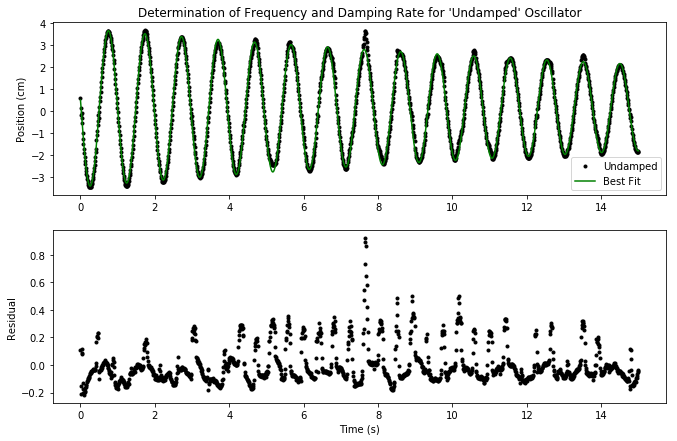

In [120]:
fig1, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

#finding optimal values(opt2) and covariance matrix (covm2) with dampedSine model
opt2, covm2 = curve_fit(dampedSine, xdata = tun, ydata = xu, p0 = [6, 6, 3,2, 2 ])
bestY2, bestw2, besta2, bestp2, bestc2= opt2
bestUndamp= dampedSine(tun, bestY2, bestw2, besta2, bestp2, bestc2)


#Plotting undamped motion
ax1.plot(tun, xu, 'k.', label='Undamped')

#plotting best fit with optimal params
ax1.plot(tun, bestUndamp, 'g-', label='Best Fit' )

#plotting residuals
ru = (xu)- bestUndamp
ax2.plot(tun, ru, 'k.')

ax1.legend()
ax1.set_title("Determination of Frequency and Damping Rate for 'Undamped' Oscillator")
ax1.set_ylabel('Position (cm)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Residual')
fig1.set_size_inches(w=11,h=7)
plt.show()

**Figure 1** The position of the weak damping (Undamped) oscillator vs time. <br>The damping ratio $Y_u$ is 0.0801 ±  0.0009. The angular frequency $w_0$ is 6.3979 ± 0.0004  rad/s.       

In [218]:
#Q factor undamped
qu = 6.39791483/0.08097996

In [235]:
#These are the optimal parameters and uncertainties on the optimal parameters
print (opt2)

a =np.power(np.diagonal(covm2), 1/2)
print (a)

[ 0.08097996  6.39791483  3.60975464  3.04605211  0.1596378 ]
[ 0.00088362  0.00044041  0.011707    0.00321928  0.00358044]


In [242]:
fu = (opt2[0])**2/(8*opt2[1])
ufu = fu*math.sqrt((2*a[0]/opt2[0])**2+(a[1]/opt2[1]))
print (ufu)

2.99130213419e-06


In [240]:
qu*math.sqrt((a[0]/opt2[0])**2+(a[1]/opt2[1])**2)

0.8621015546992062

In [ ]:
dam = np.loadtxt("dampedData.csv", delimiter= ",")
xd = dam[:,1]
tdam= dam[:,0]
print (dam)

In [ ]:
opt, covm = curve_fit(dampedSine, xdata = tdam, ydata = xd, p0 = [4, 2, 3, 0,0])
bestY, bestw, besta, bestp, bestc = opt
bestDamp = dampedSine(tdam, bestY, bestw, besta, bestp, bestc)

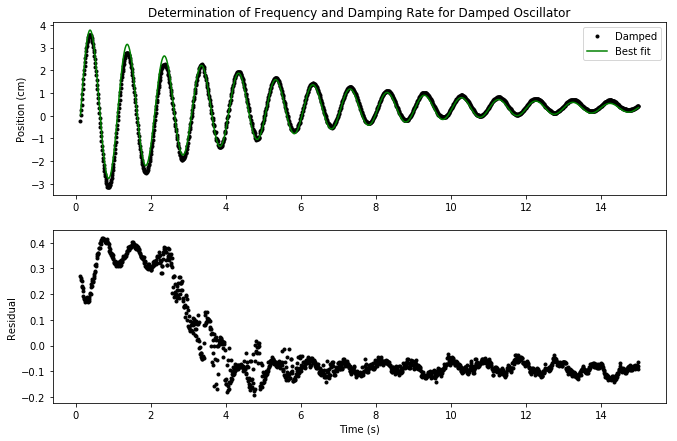

In [121]:
plt.figure()
fig2, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)

#finding opt values (opt) and covariance matrix (covm) with damped sine model
opt, covm = curve_fit(dampedSine, xdata = tdam, ydata = xd, p0 = [4, 2, 3, 0,0])
bestY, bestw, besta, bestp, bestc = opt
bestDamp = dampedSine(tdam, bestY, bestw, besta, bestp, bestc)


#plotting damped motion
ax1.plot(tdam[13:], xd[13:], 'k.', label= 'Damped')

#plotting best fit of damped motion with optimal param
ax1.plot(tdam[13:], bestDamp[13:], 'g-', label=)

#plotting residuals
rd = bestDamp[13:]-xd[13:]
ax2.plot(tdam[13:], rd, 'k.')

ax1.legend()
ax1.set_title("Determination of Frequency and Damping Rate for Damped Oscillator")
ax1.set_ylabel('Position (cm)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Residual')
fig2.set_size_inches(w=11,h=7)
plt.show()

**Figure 2** The position of the Damped oscillator vs time. <br>The damping ratio  $Y_d$  is 0.407 ± 0.003. The angular frequency $w_1$ is 6.350 ± 0.002 rad/s.

In [227]:
#Q factor damped
qd =6.3501297/ 0.40747231
qd

15.584199328783837

In [239]:
qd*math.sqrt((b[0]/opt[0])**2+(b[1]/opt[1])**2)

0.13313882819872946

In [245]:
fd = (opt[0])**2/(8*opt[1])
ufd = fd*math.sqrt((2*b[0]/opt[0])**2+(b[1]/opt[1]))
print (fd)
print (ufd)

0.00326831282492
7.71383177906e-05


In [231]:
#optimal values and uncertainties on damped motion
print (opt)
b = np.power((np.diagonal(covm)), 1/2)
print (b)

[ 0.40747231  6.3501297   3.70607512 -0.90831824  0.3407301 ]
[ 0.00347943  0.00168523  0.02207201  0.00560011  0.00426462]


In [251]:
#These are the uncertainties on the optimal parameters
np.diagonal(covm)

array([  1.21064660e-05,   2.84001260e-06,   4.87173785e-04,
         3.13611880e-05,   1.81869786e-05])

In [252]:
print (opt[1]+ 0.002)
print (opt[1]- 0.002)

print (opt2[1]+0.0004)
print (opt2[1]-0.0004)

6.35212969532
6.34812969532
6.39831483266
6.39751483266
